In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as sco
import pandas as pd
import glob
import seaborn as sns

plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

df_in = pd.read_csv('Samlet_glas_til_luft_df.csv')
df = df_in[['Angle_small','Angle_alpha','Angle_big_t','Angle_big_r','Coff_Rp','Coff_Rp_err','Coff_Rs','Coff_Rs_err']].copy()
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err
0,15,0.5,6,152,0.011524,0.009936,0.009250,0.005992
1,20,0.5,9,142,0.005317,0.005397,0.010748,0.004218
2,25,0.5,12,133,0.005818,0.006262,0.012715,0.003757
3,30,0.5,15,122,-0.000141,0.007245,0.021360,0.003588
4,32,0.5,17,119,0.002838,0.010906,0.027885,0.006180
5,34,0.5,19,115,0.001712,0.009410,0.033543,0.004176
6,36,0.5,21,110,-0.000987,0.005333,0.032368,0.004011
7,38,0.5,24,106,0.003499,0.007981,0.044843,0.004193
8,40,0.5,28,102,0.009293,0.004731,0.048047,0.001890
9,42,0.5,33,98,0.474621,0.006778,0.099825,0.003755


In [2]:
def theta_2(x):
    return x[0] - x[2]

def err_tht2(x):
    return np.sqrt(2)*x[1]

df['Theta_2'] = df.apply(theta_2, axis=1)
df['Err_tht2'] = df.apply(err_tht2, axis=1)

def R_p(x):
    return (np.tan(x[0]-x[8]))**2/(np.tan(x[0]+x[8]))**2

df['R_p'] = df.apply(R_p, axis=1)
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err,Theta_2,Err_tht2,R_p
0,15,0.5,6,152,0.011524,0.009936,0.009250,0.005992,9.0,0.707107,0.018580
1,20,0.5,9,142,0.005317,0.005397,0.010748,0.004218,11.0,0.707107,1.048666
2,25,0.5,12,133,0.005818,0.006262,0.012715,0.003757,13.0,0.707107,4.198869
3,30,0.5,15,122,-0.000141,0.007245,0.021360,0.003588,15.0,0.707107,0.279275
4,32,0.5,17,119,0.002838,0.010906,0.027885,0.006180,15.0,0.707107,787.215827
5,34,0.5,19,115,0.001712,0.009410,0.033543,0.004176,15.0,0.707107,0.002283
6,36,0.5,21,110,-0.000987,0.005333,0.032368,0.004011,15.0,0.707107,2.860904
7,38,0.5,24,106,0.003499,0.007981,0.044843,0.004193,14.0,0.707107,0.124387
8,40,0.5,28,102,0.009293,0.004731,0.048047,0.001890,12.0,0.707107,0.002162
9,42,0.5,33,98,0.474621,0.006778,0.099825,0.003755,9.0,0.707107,6954.752874


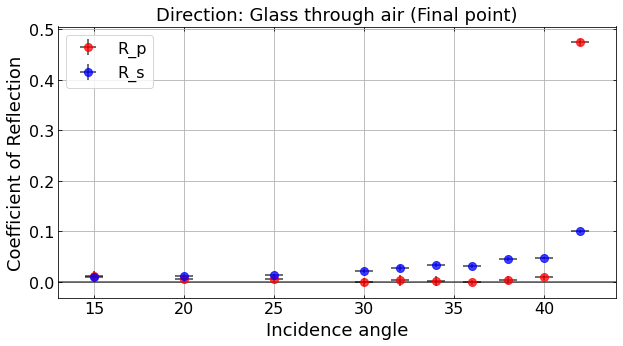

In [3]:
#Sketch
fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rp'],
             fmt='o',mfc='r',mec='r',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rp_err'], 
             ecolor='k',label='R_p',alpha=0.75)

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rs'],
             fmt='o',mfc='b',mec='b',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rs_err'], 
             ecolor='k',label='R_s',alpha=0.75)
ax.grid()
ax.legend()
ax.set_xlim([13,44])
ax.hlines(0,0,45,alpha=0.5,linewidth=2)
ax.set_title('Direction: Glass through air (Final point)')
ax.set_ylabel('Coefficient of Reflection')
ax.set_xlabel('Incidence angle')

plt.savefig("glas_til_luft_plot.pdf")